### Packages

In [514]:
# Data wrangling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

# Added
import statsmodels.formula.api as smf

### Functions

In [515]:
# Define function that print the minimum and maximum values of a defines variable in the data frame
def get_min_and_max(df, variable_name, no_min, no_max):
    array = df[variable_name].fillna(0).unique()
    sorted_array = np.sort(array)
    
    min_values = sorted_array[:no_min]
    max_values = sorted_array[-no_max:]
    
    print(f"{no_min} minimum values of '{variable_name}':")
    print(min_values)
    print('\n')
    print(f"{no_max} maximum values of '{variable_name}':")
    print(max_values)

In [516]:
def plot_linear_regression(df, dependent_variable, independent_variable):
    """
    Function 
    """
    # Filter NaN values from specific columns
    #df = df.dropna(subset=[dependent_variable, independent_variable])
    #df = df.reset_index(drop=True)


    # Declare the model
    formula = f"{dependent_variable} ~ {independent_variable}"
    mod = smf.ols(formula=formula, data=df)

    # Fit the model
    np.random.seed(2)
    res = mod.fit()

    # Print the summary output provided by the library
    print(res.summary())

    # Plot the distribution of dependent_variable and independent_variable
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(df[dependent_variable], kde=True)
    plt.title(f"Distribution of {dependent_variable}")

    plt.subplot(1, 2, 2)
    sns.histplot(df[independent_variable], kde=True)
    plt.title(f"Distribution of {independent_variable}")

    plt.tight_layout()
    plt.show()

    # Plot the linear regression line and regression points
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=independent_variable, y=dependent_variable, data=df, alpha=0.5)
    sns.regplot(x=independent_variable, y=dependent_variable, data=df, scatter=False, color='red', line_kws={'label':'Linear Regression Line'})

    plt.title(f"Linear Regression: {dependent_variable} vs. {independent_variable}")
    plt.xlabel(independent_variable)
    plt.ylabel(dependent_variable)
    plt.legend()
    plt.show()

In [517]:
def linear_regression(df, dependent_variable, independent_variables, categorical_variables=None):
    """
    Function to plot linear regression and distributions.

    Parameters:
    - df: DataFrame
    - dependent_variable: str, the name of the dependent variable
    - independent_variables: list, names of the independent variables (numerical or categorical)
    - categorical_variables: list, names of categorical variables

    """
    # Ensure independent_variables is a list
    if not isinstance(independent_variables, list):
        independent_variables = [independent_variables]

    # Ensure categorical_variables is a list
    if categorical_variables is None:
        categorical_variables = []
    elif not isinstance(categorical_variables, list):
        categorical_variables = [categorical_variables]

    # Filter NaN values from specific columns
    #columns_to_filter = [dependent_variable] + independent_variables + categorical_variables
    #df = df.dropna(subset=columns_to_filter)
    #df = df.reset_index(drop=True)

    # Construct the formula
    formula = f"{dependent_variable} ~ {' + '.join(independent_variables)}"

    # Include categorical variables in the formula
    if categorical_variables:
        categorical_formula = ' + '.join([f'C({var})' for var in categorical_variables])
        formula += f" + {categorical_formula}"

    # Fit the model
    mod = smf.ols(formula=formula, data=df)
    res = mod.fit()

    # Print the summary output provided by the library
    print(res.summary())
    
    # Plot the distribution of dependent_variable and independent_variables
    plt.figure(figsize=(12, 6))

    plt.subplot(1, len(independent_variables) + 1, 1)
    sns.histplot(df[dependent_variable], kde=True)
    plt.title(f"Distribution of {dependent_variable}")

    for i, variable in enumerate(independent_variables, start=2):
        plt.subplot(1, len(independent_variables) + 1, i)
        sns.histplot(df[variable], kde=True)
        plt.title(f"Distribution of {variable}")

    plt.tight_layout()
    plt.show()

# Data wrangling and exploration

We begin by loading the two data sets and looking at the different attributes. We decide to add two columns **Movie release year** and **Actor birth year**.

In [518]:
# Load datasets
data_folder = './data_cleaned/'
movie_metadata = pd.read_csv(data_folder + 'movie_cleaned.csv', lineterminator='\n')
character_metadata = pd.read_csv(data_folder + 'character_cleaned.csv')

/var/folders/zp/zj6kbf7d5mv37j0rsdb53g200000gn/T/ipykernel_1147/132682489.py:3: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  movie_metadata = pd.read_csv(data_folder + 'movie_cleaned.csv', lineterminator='\n')


In [519]:
character_metadata

,Unnamed: 0,Wikipedia Movie ID,Freebase Movie ID,Movie release date,Character name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor name,Actor age at movie release,Freebase character map,Freebase character ID,Freebase actor ID,Movie release year,Actor birth year,log Movie release year
0,0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001.0,1958.0,7.601402
1,1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001.0,1974.0,7.601402
2,2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001.0,1969.0,7.601402
3,3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001.0,1967.0,7.601402
4,4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001.0,1977.0,7.601402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,1992.0,1970.0,7.596894
450665,450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j,1992.0,1965.0,7.596894
450666,450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44,1957.0,1941.0,7.579168
450667,450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm,1957.0,NaN,7.579168


In [520]:
movie_metadata.columns

Index(['Unnamed: 0', 'Wikipedia Movie ID', 'Freebase Movie ID', 'Movie name',
       'Movie release date', 'Movie runtime', 'Movie languages',
       'Movie countries', 'Movie genres', 'TMDB_id', 'TMDB_original_language',
       'TMDB_original_title', 'TMDB_overview', 'TMDB_popularity',
       'TMDB_release_date', 'TMDB_title', 'TMDB_vote_average',
       'TMDB_vote_count', 'TMDB_runtime', 'TMDB_budget', 'TMDB_IMDB_id',
       'TMDB_genres', 'Movie box office revenue', 'Movie release year',
       'log Movie box office revenue', 'log Movie release year'],
      dtype='object')

# Start Emma

**Change column names**

In [521]:
# Replace spaces with underscores in column names
movie_metadata.columns = movie_metadata.columns.str.replace(' ', '_')
character_metadata.columns = character_metadata.columns.str.replace(' ', '_')

**Filter so that only movies with revenue are included**


In [522]:
movie_metadata = movie_metadata[movie_metadata['Movie_box_office_revenue'].notna()]

In [523]:
movie_metadata.shape

(10018, 26)

**Look at attributes and see where we have missing data**

In [524]:
movie_metadata.isna().sum()

Unnamed:_0                         0
Wikipedia_Movie_ID                 0
Freebase_Movie_ID                  0
Movie_name                         0
Movie_release_date                73
Movie_runtime                    308
Movie_languages                    0
Movie_countries                    0
Movie_genres                       0
TMDB_id                          123
TMDB_original_language           123
TMDB_original_title              123
TMDB_overview                    143
TMDB_popularity                  123
TMDB_release_date                152
TMDB_title                       123
TMDB_vote_average                123
TMDB_vote_count                  123
TMDB_runtime                    4688
TMDB_budget                     4688
TMDB_IMDB_id                    4727
TMDB_genres                     4718
Movie_box_office_revenue           0
Movie_release_year                74
log_Movie_box_office_revenue       0
log_Movie_release_year            74
dtype: int64

We are missing data from 123 vote averages. Since we want to look at this column we filter the data. You can also see that a lot of budget data is missing. As we will see later we do not think we can use this data and we will therefore not filter for this value

In [525]:
movie_metadata = movie_metadata[movie_metadata['TMDB_vote_average'].notna()]

In [526]:
movie_metadata.shape

(9895, 26)

In [527]:
movie_metadata.isna().sum()

Unnamed:_0                         0
Wikipedia_Movie_ID                 0
Freebase_Movie_ID                  0
Movie_name                         0
Movie_release_date                 0
Movie_runtime                    287
Movie_languages                    0
Movie_countries                    0
Movie_genres                       0
TMDB_id                            0
TMDB_original_language             0
TMDB_original_title                0
TMDB_overview                     20
TMDB_popularity                    0
TMDB_release_date                 29
TMDB_title                         0
TMDB_vote_average                  0
TMDB_vote_count                    0
TMDB_runtime                    4565
TMDB_budget                     4565
TMDB_IMDB_id                    4604
TMDB_genres                     4595
Movie_box_office_revenue           0
Movie_release_year                 1
log_Movie_box_office_revenue       0
log_Movie_release_year             1
dtype: int64

**TMDB vote count**


We filter the data so that movies with less than 20 ratings are taken out

In [528]:
get_min_and_max(df=movie_metadata, variable_name='TMDB_vote_count', no_min=10, no_max=10)

10 minimum values of 'TMDB_vote_count':
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


10 maximum values of 'TMDB_vote_count':
[24843. 24994. 25554. 25601. 26088. 27446. 29290. 29943. 30843. 34697.]


In [529]:
movie_metadata['TMDB_vote_count'].describe()

count     9895.000000
mean      1015.483679
std       2401.807889
min          0.000000
25%         40.000000
50%        192.000000
75%        865.500000
max      34697.000000
Name: TMDB_vote_count, dtype: float64

Text(0.5, 1.0, 'Distribution of  TMDB_vote_count before filtering')

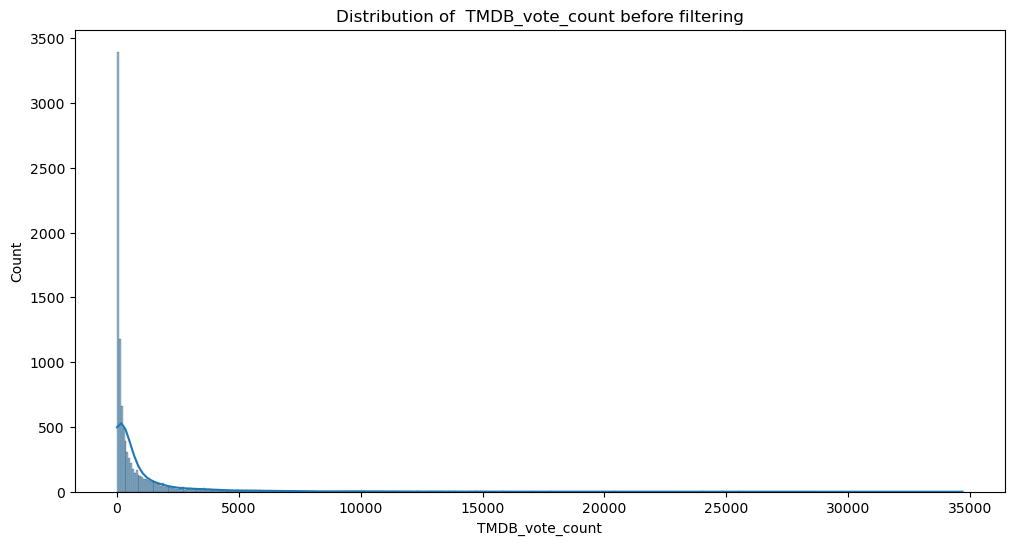

In [530]:
plt.figure(figsize=(12, 6))
sns.histplot(movie_metadata['TMDB_vote_count'],kde=True)
plt.title("Distribution of  TMDB_vote_count before filtering")

In [531]:
#condition = (movie_metadata['TMDB_vote_count'] >= 4)
#movie_metadata = movie_metadata[condition]

# How many do we remove?
Should we remove for 10 instead

/Users/emmaceleste/miniconda3/envs/ada/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Distribution of log of TMDB_vote_count')

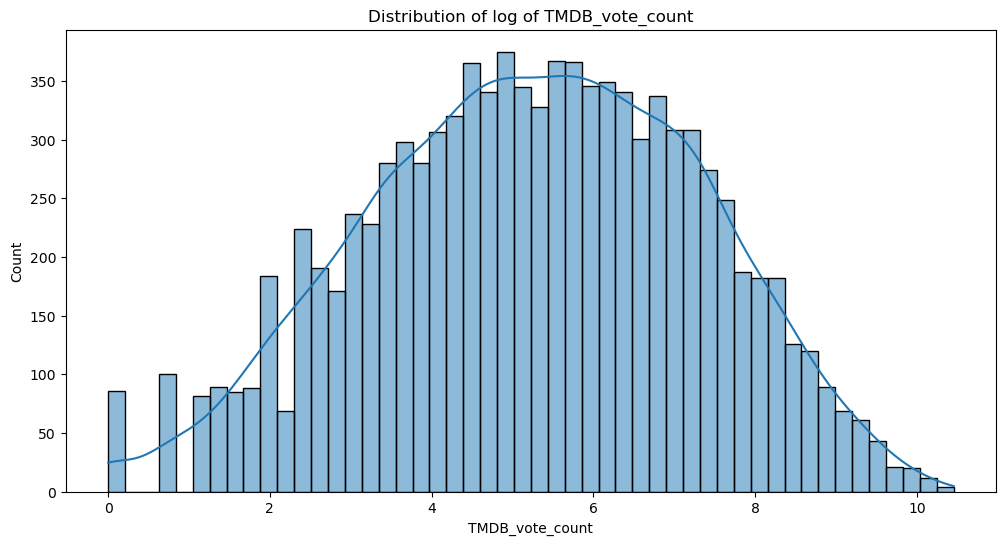

In [532]:
plt.figure(figsize=(12, 6))
sns.histplot(np.log(movie_metadata['TMDB_vote_count']),kde=True, bins=50)
plt.title("Distribution of log of TMDB_vote_count")

**TMDB vote average**

Having filtered the data so every movie have at least 20 reviews we can now do a linear regression on TMDB vote average and movie release year

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.502
Date:                Wed, 13 Dec 2023   Prob (F-statistic):             0.0339
Time:                        13:21:04   Log-Likelihood:                -15977.
No. Observations:                9894   AIC:                         3.196e+04
Df Residuals:                    9892   BIC:                         3.197e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              8.7237      1

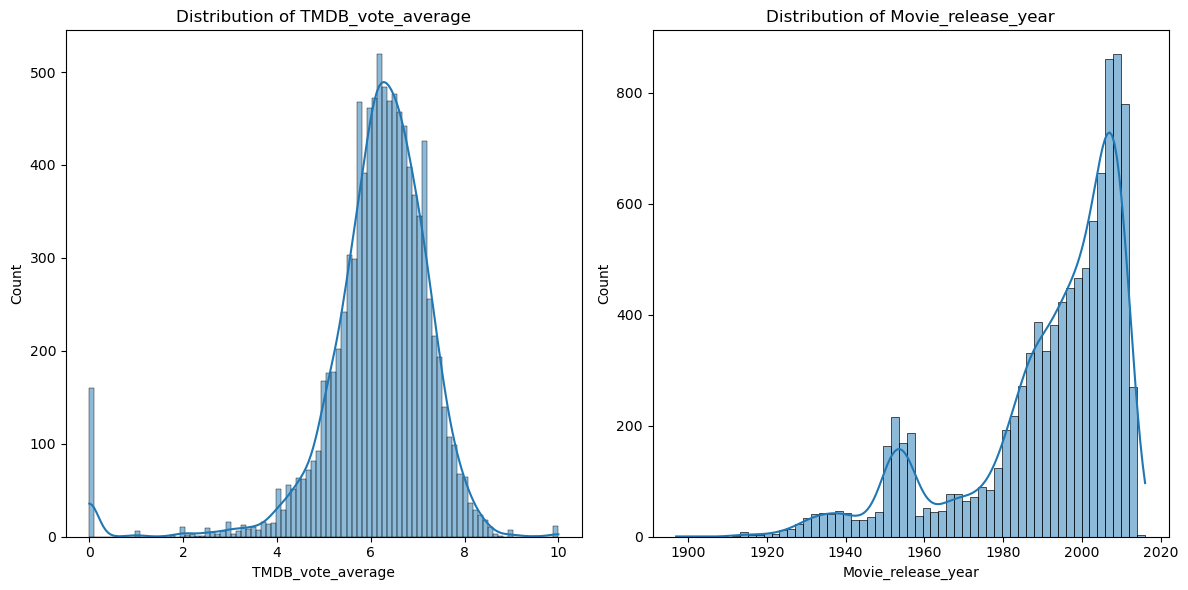

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


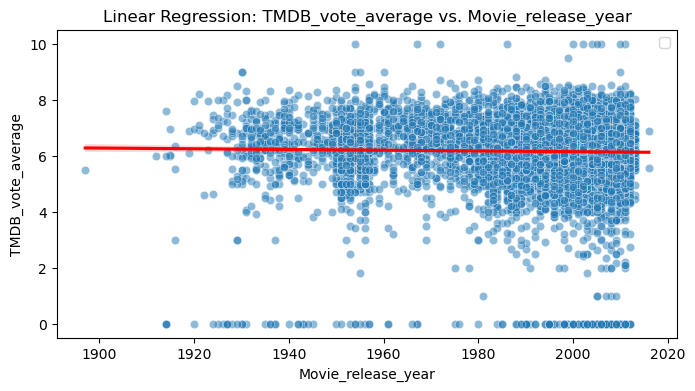

In [533]:
plot_linear_regression(movie_metadata, "TMDB_vote_average", "Movie_release_year")


**Runtime**

We now look at the runtime of the movie. We both have runtime from the original dataset and from the TMDB dataset. We can see that a lot of data is missing in TMDB runtime. Also data is missing in the movie metadata 

In [534]:
movie_metadata['TMDB_runtime'].isna().sum()

4565

In [535]:
movie_metadata['Movie_runtime'].isna().sum()

287

In [536]:
movie_metadata['Movie_runtime'].describe()

count    9608.000000
mean      105.187625
std        20.732663
min         1.500000
25%        93.000000
50%       102.000000
75%       114.000000
max       300.000000
Name: Movie_runtime, dtype: float64

In [537]:
movie_metadata['Movie_runtime'].isna().count()

9895

Text(0.5, 1.0, 'Distribution of Movie_runtime')

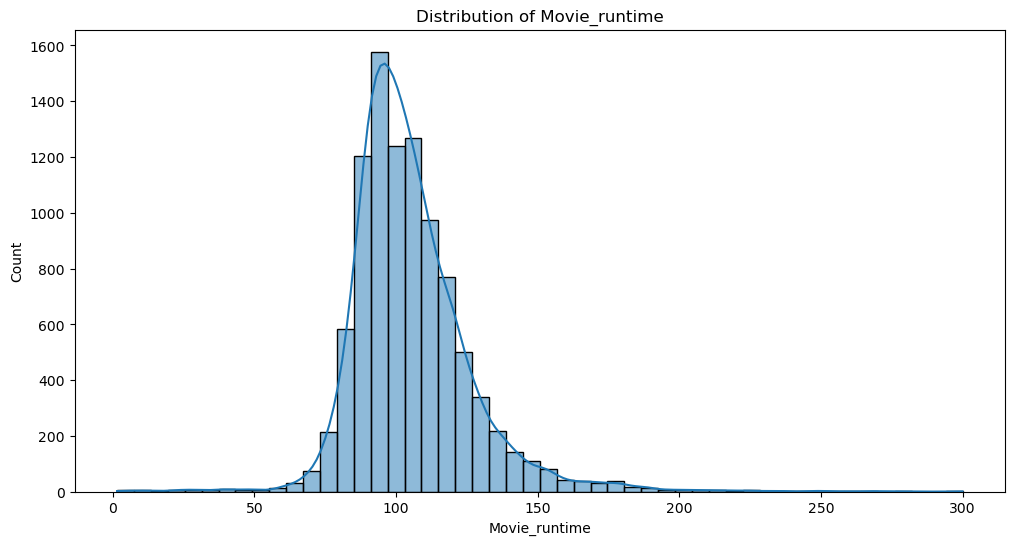

In [538]:
plt.figure(figsize=(12, 6))
sns.histplot(movie_metadata['Movie_runtime'],kde=True, bins=50)
plt.title("Distribution of Movie_runtime")

In [539]:
# Fill missing values in 'Movie_runtime' with values from 'TMDB_runtime'
movie_metadata['Movie_runtime'] = movie_metadata['Movie_runtime'].fillna(movie_metadata['TMDB_runtime'])
movie_metadata['Movie_runtime'].isna().sum()

54

We managed to populate the Movie runtime column with data from the the TMDB runtime column. We filter by runtime: 

In [540]:
get_min_and_max(df=movie_metadata, variable_name='Movie_runtime', no_min=5, no_max=5)

5 minimum values of 'Movie_runtime':
[0.  1.5 4.5 5.  6. ]


5 maximum values of 'Movie_runtime':
[268. 269. 280. 300. 333.]


## NB - find confidence interval

In [541]:
#condition1 = (movie_metadata['Movie_runtime'] > 6)
#condition2 = (movie_metadata['Movie_runtime'] < 268)
#movie_metadata = movie_metadata[condition1 & condition2]

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     431.3
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           8.51e-94
Time:                        13:21:11   Log-Likelihood:                -15606.
No. Observations:                9841   AIC:                         3.122e+04
Df Residuals:                    9839   BIC:                         3.123e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.9272      0.060     81.684

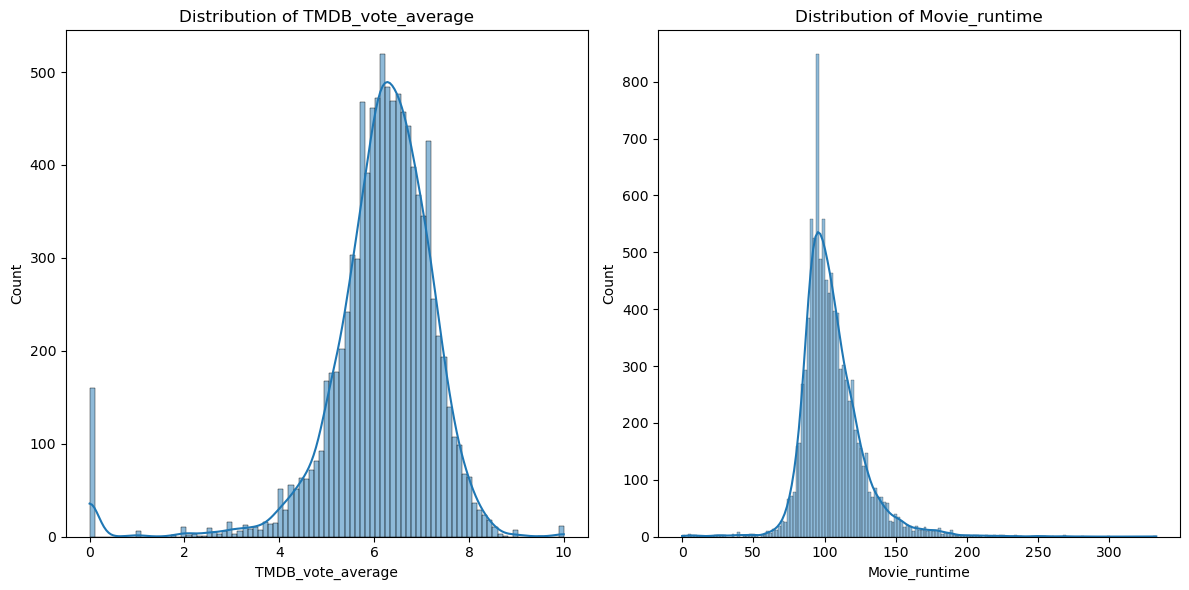

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


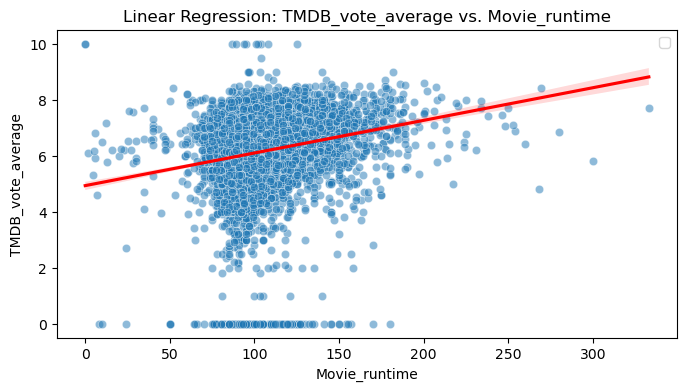

In [542]:
plot_linear_regression(movie_metadata, "TMDB_vote_average", "Movie_runtime")

**Vote count log**

In [543]:
movie_metadata['log_TMDB_vote_count'] = np.log(movie_metadata['TMDB_vote_count'])

/Users/emmaceleste/miniconda3/envs/ada/lib/python3.9/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [544]:
plot_linear_regression(movie_metadata, "TMDB_vote_average", "log_TMDB_vote_count")

LinAlgError: SVD did not converge

**Original language**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     8.075
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           4.21e-47
Time:                        13:14:14   Log-Likelihood:                -11956.
No. Observations:                9413   AIC:                         2.400e+04
Df Residuals:                    9370   BIC:                         2.431e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

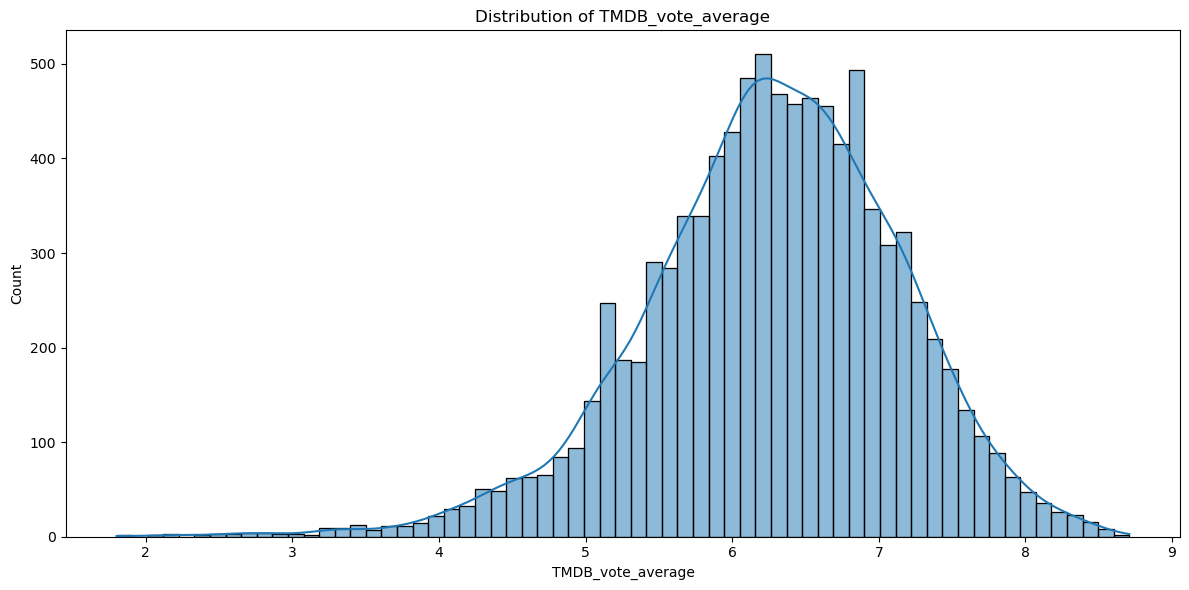

In [ ]:
linear_regression(movie_metadata, "TMDB_vote_average",[], categorical_variables=["TMDB_original_language"])


In [ ]:
type(movie_metadata['TMDB_original_language'][0])

str

In [ ]:
movie_metadata[movie_metadata['TMDB_original_language']=='tr']

,Unnamed:_0,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_name,Movie_release_date,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,TMDB_id,...,TMDB_vote_count,TMDB_runtime,TMDB_budget,TMDB_IMDB_id,TMDB_genres,Movie_box_office_revenue,Movie_release_year,log_Movie_box_office_revenue,log_Movie_release_year,log_TMDB_vote_count
258,258,29174042,/m/0dlm0sz,Toll Booth,2010-10-09,97.0,['Turkish'],['Turkey'],['Drama'],66574.0,...,36.0,96.0,0.0,tt1753866,Drama,103821.0,2010.0,11.550424,7.605890,3.583519
615,615,26890096,/m/0bmf535,Çok Filim Hareketler Bunlar,2010-03-26,103.0,[],[],['Comedy film'],46733.0,...,40.0,134.0,0.0,tt1640202,Comedy,6220450.0,2010.0,15.643353,7.605890,3.688879
1797,1797,10475102,/m/02qf760,Tosun Paşa,1976,90.0,['Turkish'],['Turkey'],['Comedy'],38794.0,...,94.0,90.0,64200.0,tt0253828,Comedy,698200.0,1976.0,13.456261,7.588830,4.543295
3130,3130,28236324,/m/0cp0gxy,Min Dît: The Children of Diyarbakır,2009,102.0,"['Turkish', 'Kurdish']","['Turkey', 'Germany']",['Drama'],78432.0,...,17.0,102.0,0.0,tt1410272,"Drama, Action, Thriller",101327.0,2009.0,11.526108,7.605392,2.833213
3634,3634,26429300,/m/0bbtx8n,Semum,2008-02-08,116.0,[],[],['Horror'],47791.0,...,21.0,117.0,0.0,tt1153085,Horror,1827047.0,2008.0,14.418212,7.604894,3.044522
6873,6873,30329264,/m/0g5shwn,Free Man,2011-01-07,163.0,[],[],"['History', 'Biographical film', 'Action', 'Dr...",65725.0,...,8.0,163.0,0.0,tt1783298,"Drama, History",3793421.0,2011.0,15.148779,7.606387,2.079442
10829,10829,16918633,/m/041247g,Çılgın dersane kampta,2008-01-11,110.0,[],['Turkey'],['Comedy'],86319.0,...,15.0,110.0,0.0,tt1176142,Comedy,5493587.0,2008.0,15.519092,7.604894,2.708050
14542,14542,26042450,/m/0b6gc3n,Maskeli Beşler: Irak,2007-01-12,108.0,[],['Turkey'],"['Comedy film', 'Adventure']",410867.0,...,28.0,104.0,0.0,tt0949751,Comedy,7717183.0,2007.0,15.858960,7.604396,3.332205
15149,15149,28299531,/m/0cn_xrm,Five Cities,2010-04-09,87.0,[],[],['Drama'],51334.0,...,18.0,95.0,0.0,tt1523415,Drama,16329.0,2010.0,9.700698,7.605890,2.890372
16395,16395,26500986,/m/0bh990y,On the Way to School,2008,81.0,[],['Turkey'],"['World cinema', 'Documentary']",37574.0,...,29.0,81.0,0.0,tt1312137,"Documentary, Drama",399581.0,2008.0,12.898172,7.604894,3.367296


**Revenue/budget**

Text(0.5, 1.0, 'Distribution of TMDB_budget')

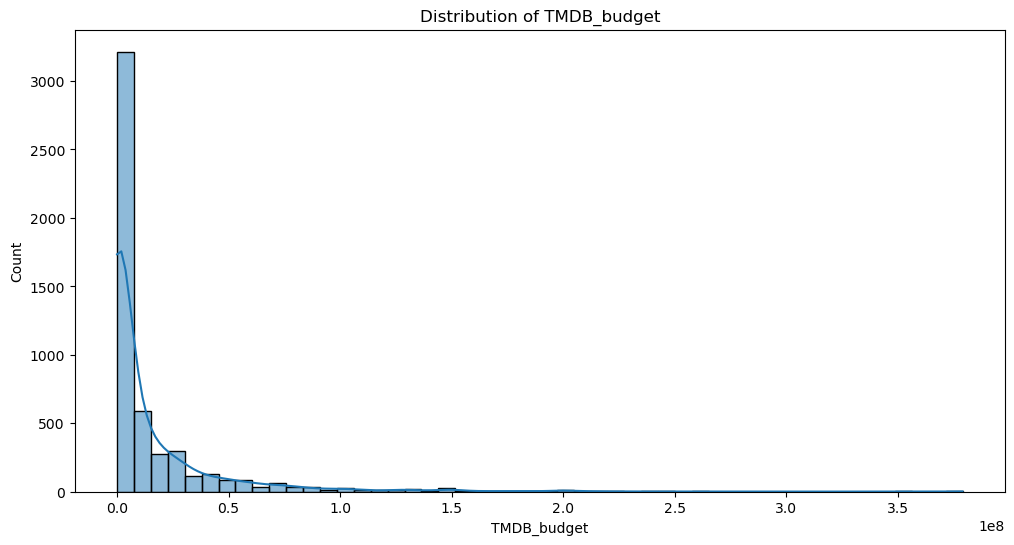

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(movie_metadata['TMDB_budget'],kde=True, bins=50)
plt.title("Distribution of TMDB_budget")

In [ ]:
get_min_and_max(df=movie_metadata, variable_name='TMDB_budget', no_min=10, no_max=10)

10 minimum values of 'TMDB_budget':
[  0.   5.   6.   8.  12.  35.  90. 107. 120. 140.]


10 maximum values of 'TMDB_budget':
[2.09e+08 2.10e+08 2.15e+08 2.20e+08 2.25e+08 2.37e+08 2.50e+08 2.58e+08
 3.56e+08 3.79e+08]


Count how many movies have a budget of 0. Since so many movies have a budget of 0 we should probably exclude this data

In [ ]:
movie_metadata[movie_metadata['TMDB_budget'] == 0]['TMDB_budget'].count()

2075

In [ ]:
movie_metadata = movie_metadata[movie_metadata['TMDB_budget']>0]

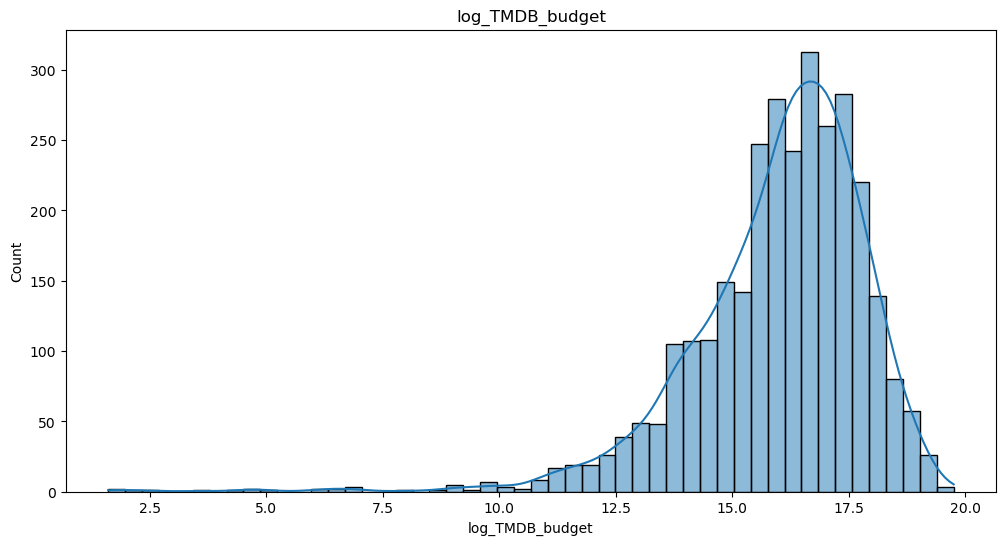

In [ ]:
movie_metadata['TMDB_rev_min_budget'] = movie_metadata['Movie_box_office_revenue'] - movie_metadata['TMDB_budget']
movie_metadata['log_TMDB_budget'] = np.log(movie_metadata['TMDB_budget'])

plt.figure(figsize=(12, 6))
sns.histplot(movie_metadata['log_TMDB_budget'], kde=True, bins=50)
plt.title("log_TMDB_budget")
plt.show() 

In [ ]:
movie_metadata['log_TMDB_budget']

0        17.147715
7        14.508658
13       16.012735
17       15.607270
29       16.588099
           ...    
35722    16.648724
35731    14.285514
35747    15.016980
35759    15.590463
35773    17.370859
Name: log_TMDB_budget, Length: 3021, dtype: float64

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07168
Date:                Wed, 13 Dec 2023   Prob (F-statistic):              0.789
Time:                        13:14:16   Log-Likelihood:                -3902.2
No. Observations:                3021   AIC:                             7808.
Df Residuals:                    3019   BIC:                             7820.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.3204      0.137     

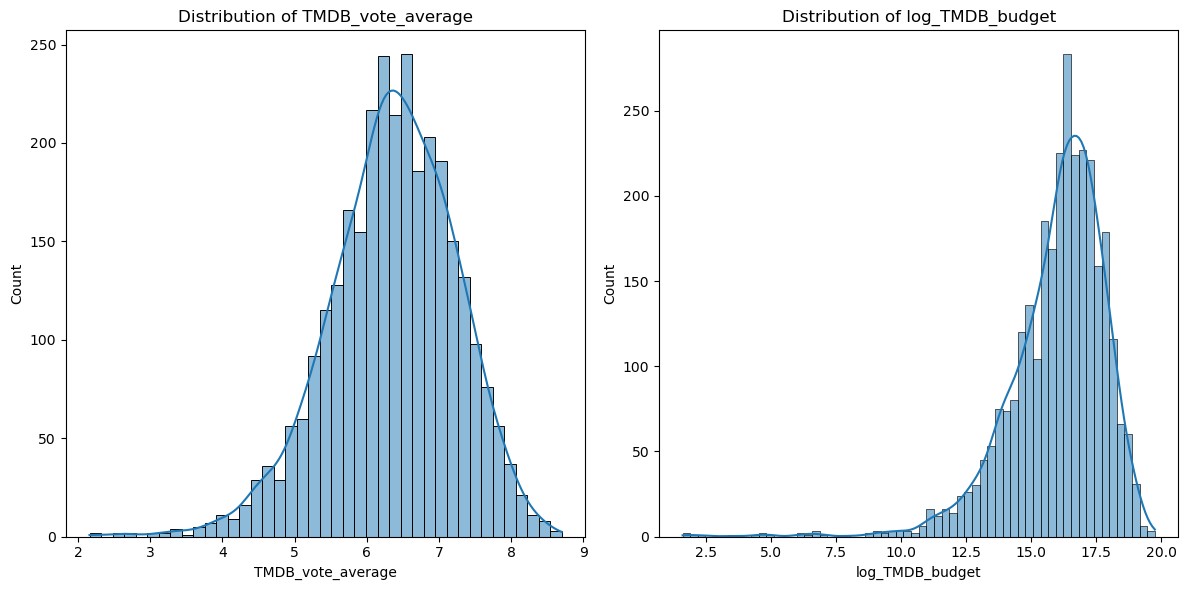

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


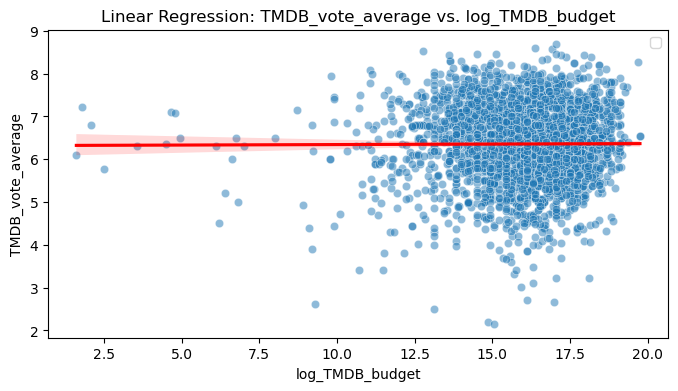

In [ ]:
plot_linear_regression(movie_metadata,'TMDB_vote_average', 'log_TMDB_budget')

**Movie genres**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     1.105
Date:                Wed, 13 Dec 2023   Prob (F-statistic):             0.0836
Time:                        13:14:41   Log-Likelihood:                -999.96
No. Observations:                3021   AIC:                             7080.
Df Residuals:                     481   BIC:                         2.235e+04
Df Model:                        2539                                         
Covariance Type:            nonrobust                                         
                                                                                                                                                                                                                  

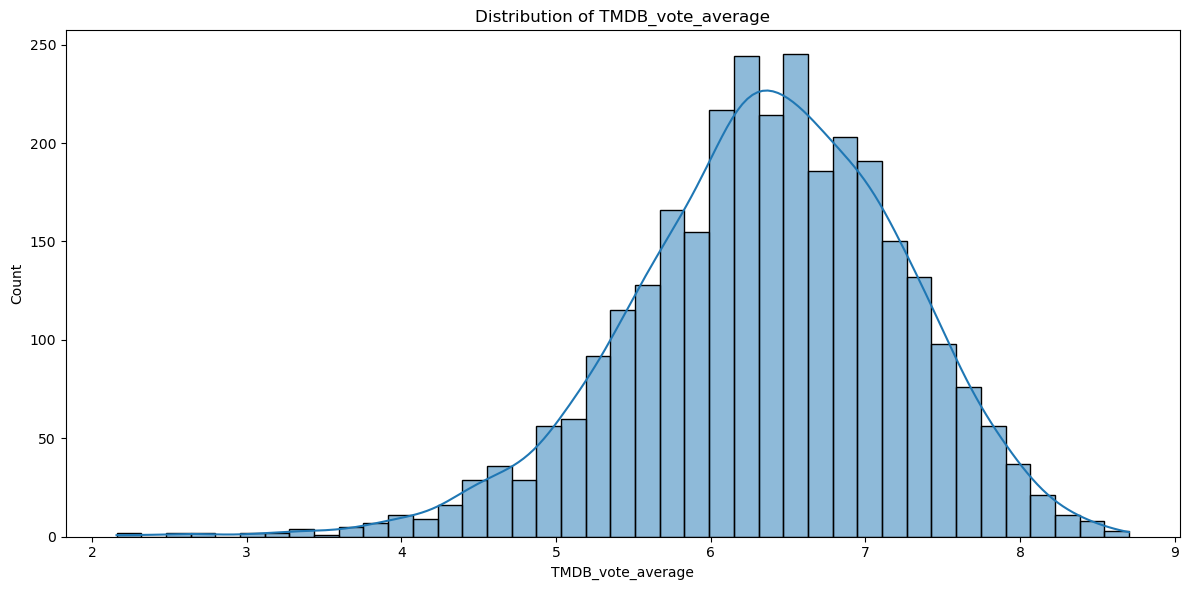

In [ ]:
linear_regression(movie_metadata, "TMDB_vote_average",[], categorical_variables=["Movie_genres"])

**TMDB vote average vs log Movie box office revenue**

                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     169.1
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           1.18e-37
Time:                        13:14:43   Log-Likelihood:                -3819.9
No. Observations:                3021   AIC:                             7644.
Df Residuals:                    3019   BIC:                             7656.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

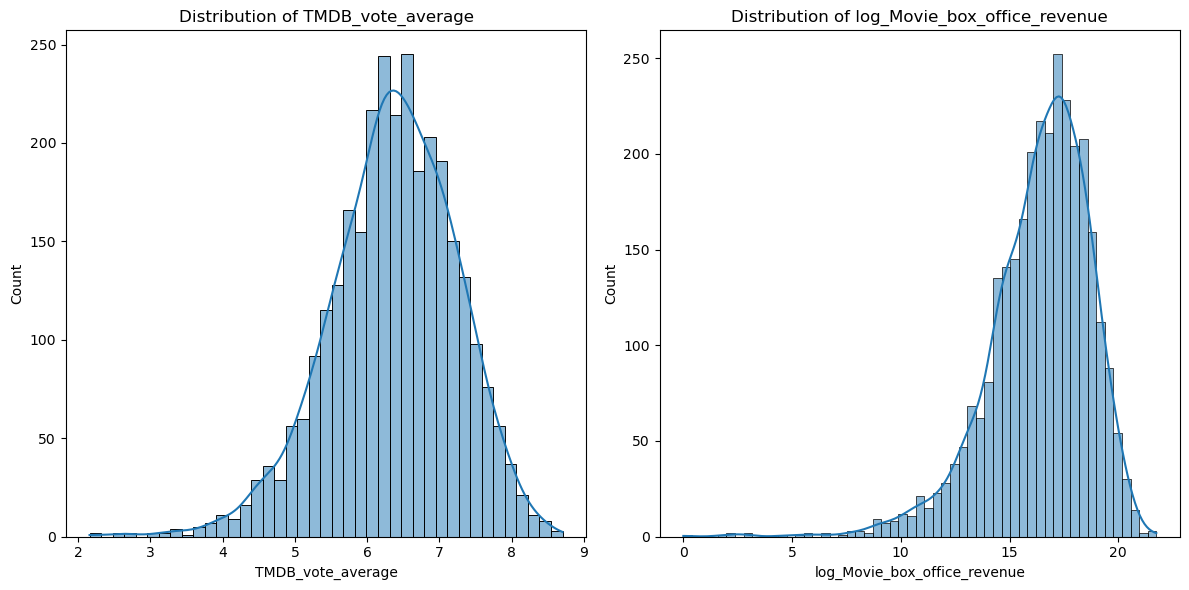

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


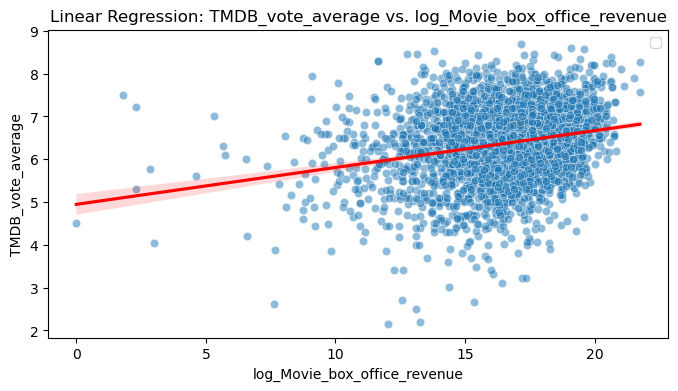

In [ ]:
plot_linear_regression(movie_metadata,"TMDB_vote_average","log_Movie_box_office_revenue")

**Male actor percentage**

We filter the character metadata so that only movies in movie metadata are included

In [ ]:
# Get a list of unique movie IDs from movie_metadata
unique_movie_ids = movie_metadata['Wikipedia_Movie_ID'].unique()

# Filter character_metadata based on the unique movie IDs
character_metadata = character_metadata[character_metadata['Wikipedia_Movie_ID'].isin(unique_movie_ids)]
character_metadata.isna().mean()

Unnamed:_0                    0.000000
Wikipedia_Movie_ID            0.000000
Freebase_Movie_ID             0.000000
Movie_release_date            0.000000
Character_name                0.299111
Actor_DOB                     0.169653
Actor_gender                  0.061003
Actor_height                  0.458899
Actor_ethnicity               0.664708
Actor_name                    0.001863
Actor_age_at_movie_release    0.208590
Freebase_character_map        0.000000
Freebase_character_ID         0.299084
Freebase_actor_ID             0.001443
Movie_release_year            0.000000
Actor_birth_year              0.169758
log_Movie_release_year        0.000000
dtype: float64

In [ ]:
#Group character_metadata by 'Wikipedia Movie ID' and calculate the percentage of male/female actors in each movie
male_percentage_per_movie = character_metadata.groupby('Wikipedia_Movie_ID')['Actor_gender'].apply(lambda x: (x == 'M').sum() / len(x) * 100).reset_index()
male_percentage_per_movie.columns = ['Wikipedia_Movie_ID', 'Male_actor_percentage']


# Merge the m dataframe with movie_metadata on 'Wikipedia Movie ID'
movie_metadata = pd.merge(movie_metadata, male_percentage_per_movie, on='Wikipedia_Movie_ID', how='left')


                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     9.726
Date:                Wed, 13 Dec 2023   Prob (F-statistic):            0.00183
Time:                        13:14:45   Log-Likelihood:                -3775.7
No. Observations:                2942   AIC:                             7555.
Df Residuals:                    2940   BIC:                             7567.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 6.18

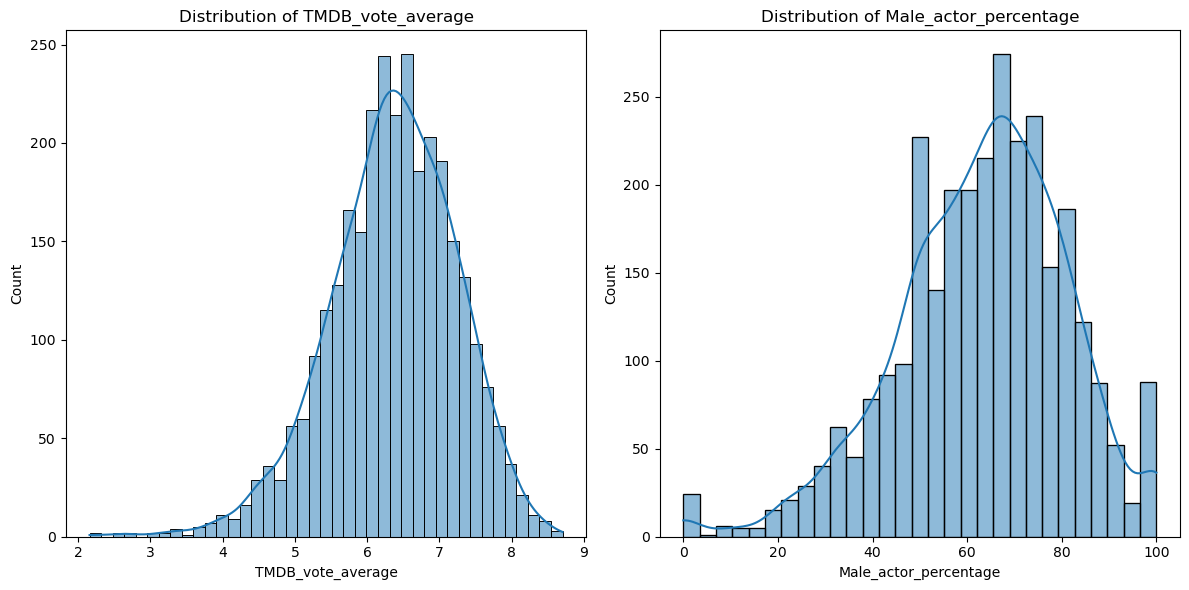

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


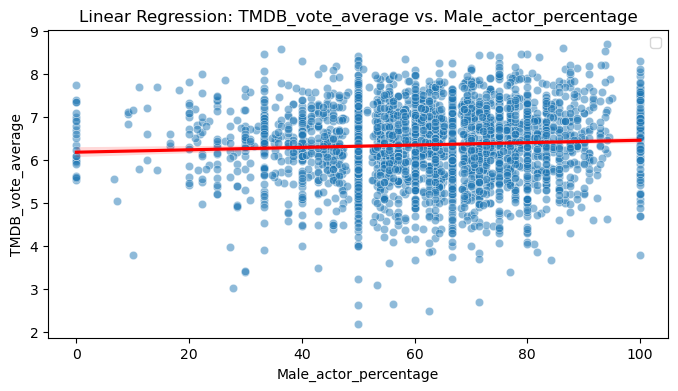

In [ ]:
plot_linear_regression(movie_metadata,'TMDB_vote_average','Male_actor_percentage')

**Average age of actors**

In [ ]:
# Group character_metadata by 'Wikipedia Movie ID' and calculate the average birth year of actors in each movie
average_actor_age_per_movie = character_metadata.groupby('Wikipedia_Movie_ID')['Actor_age_at_movie_release'].mean().reset_index()
average_actor_age_per_movie.columns = ['Wikipedia_Movie_ID', 'Mean_actor_age_at_movie_release']

# Merge the dataframe with movie_metadata on 'Wikipedia Movie ID'
movie_metadata = pd.merge(movie_metadata, average_actor_age_per_movie, on='Wikipedia_Movie_ID', how='left')


                            OLS Regression Results                            
Dep. Variable:      TMDB_vote_average   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.02129
Date:                Wed, 13 Dec 2023   Prob (F-statistic):              0.884
Time:                        13:14:47   Log-Likelihood:                -3663.6
No. Observations:                2854   AIC:                             7331.
Df Residuals:                    2852   BIC:                             7343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

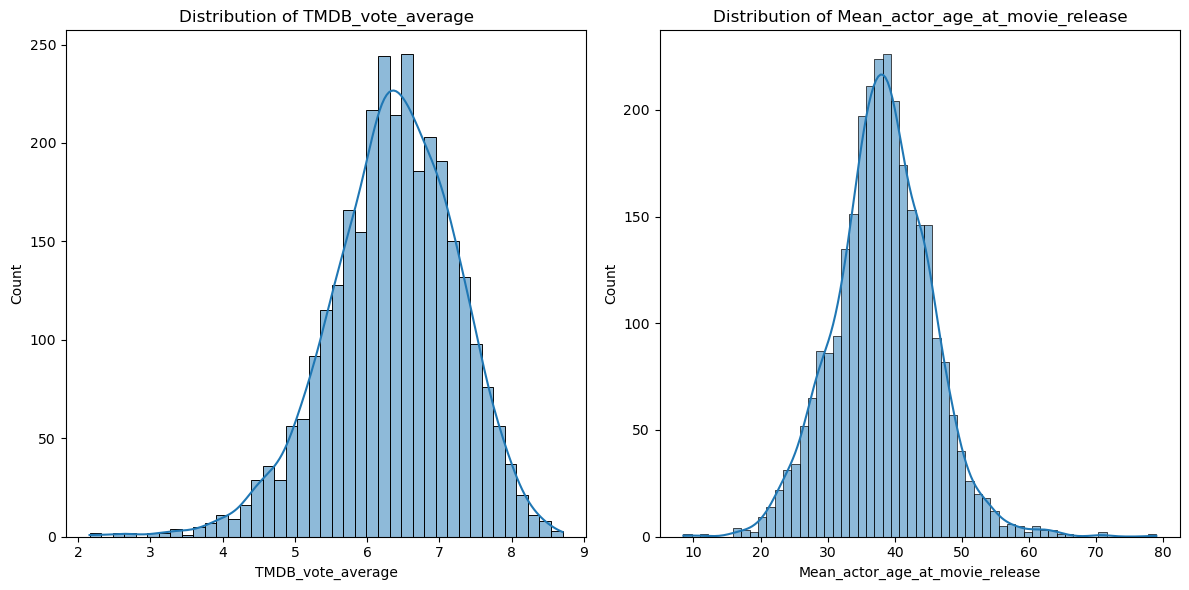

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


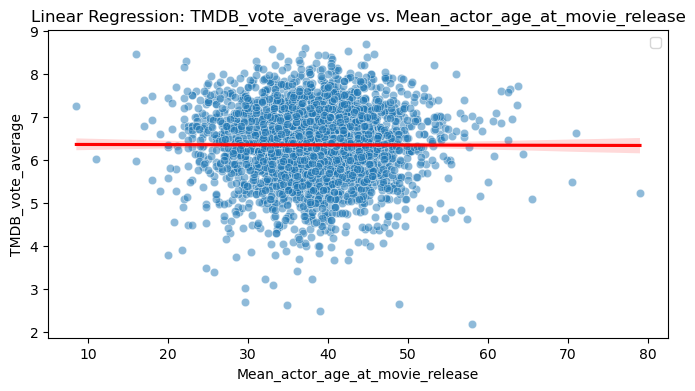

In [ ]:
plot_linear_regression(movie_metadata,'TMDB_vote_average','Mean_actor_age_at_movie_release')

In [ ]:
character_metadata

,Unnamed:_0,Wikipedia_Movie_ID,Freebase_Movie_ID,Movie_release_date,Character_name,Actor_DOB,Actor_gender,Actor_height,Actor_ethnicity,Actor_name,Actor_age_at_movie_release,Freebase_character_map,Freebase_character_ID,Freebase_actor_ID,Movie_release_year,Actor_birth_year,log_Movie_release_year
0,0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,2001.0,1958.0,7.601402
1,1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,2001.0,1974.0,7.601402
2,2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,2001.0,1969.0,7.601402
3,3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,2001.0,1967.0,7.601402
4,4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,2001.0,1977.0,7.601402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446710,446710,2441360,/m/07d83t,1980-05-16,NaN,1943,F,NaN,NaN,Savannah Smith Boucher,37.0,/m/0gbwm_s,NaN,/m/07kj4bw,1980.0,1943.0,7.590852
446711,446711,2441360,/m/07d83t,1980-05-16,NaN,1953-11-01,M,NaN,NaN,Kevin Brophy,26.0,/m/0gc1jwc,NaN,/m/072sx_,1980.0,1953.0,7.590852
446712,446712,2441360,/m/07d83t,1980-05-16,NaN,NaN,F,NaN,NaN,Shelby Leverington,NaN,/m/0gc356l,NaN,/m/0b_h6j8,1980.0,NaN,7.590852
446713,446713,2441360,/m/07d83t,1980-05-16,NaN,1925-09-18,NaN,NaN,NaN,Felice Orlandi,54.0,/m/0gcbvdf,NaN,/m/0gcbvdj,1980.0,1925.0,7.590852
